In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

plt.style.use('ggplot')
# plots of BT only work with this following command
%matplotlib inline

## Retorno dos Ativos

/home/victormmp/.virtualenvs/rl_mestrado/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<AxesSubplot:>

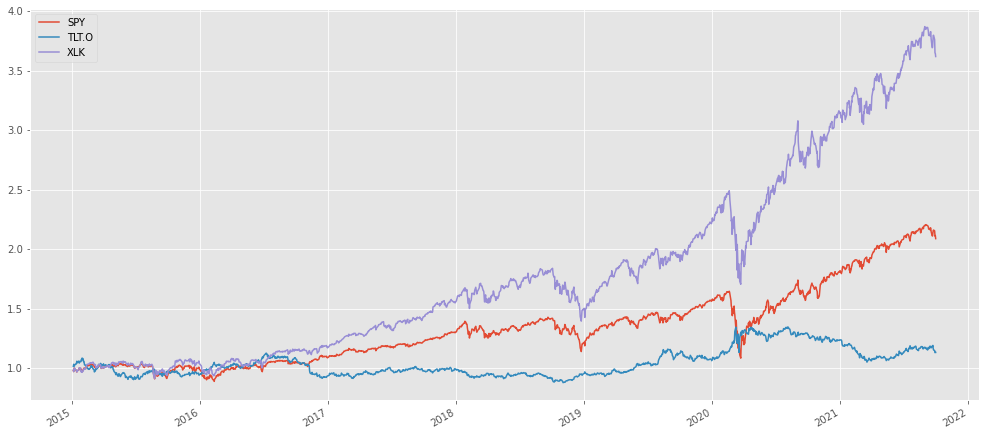

In [2]:
import os
DATA_PATH = os.path.join('..', 'silver', 'daily_feature_set.csv')
NAME_SUFFIX = "daily_v2"
ASSETS = ['SPY', 'TLT.O', 'XLK']
START_OUT_SAMPLE = '2015-01-05'
END_OUT_SAMPLE = '2021-09-30'

#=======================================================| TRAIN

data = pd.read_csv(DATA_PATH, parse_dates=True, index_col=0)
data = data.loc[(~data['TLT.O_logReturns'].isnull()) | (~data['TAIL.K_logReturns'].isnull())]
data.fillna(0, inplace=True)

start_out_samp = pd.Timestamp(START_OUT_SAMPLE)
end_out_samp = pd.Timestamp(END_OUT_SAMPLE)

df_out_sample = data.loc[start_out_samp:end_out_samp, :]


df_out_sample.loc[:,'XLK_cumsum'] = df_out_sample[['XLK_logReturns']].cumsum()
df_out_sample.loc[:, 'XLK'] = df_out_sample['XLK_cumsum'].apply(np.exp)

df_out_sample.loc[:, 'SPY_cumsum'] = df_out_sample[['SPY_logReturns']].cumsum()
df_out_sample.loc[:, 'SPY'] = df_out_sample['SPY_cumsum'].apply(np.exp)

df_out_sample.loc[:, 'TLT.O_cumsum'] = df_out_sample[['TLT.O_logReturns']].cumsum()
df_out_sample.loc[:, 'TLT.O'] = df_out_sample['TLT.O_cumsum'].apply(np.exp)

df_out_sample[['SPY', 'TLT.O', 'XLK']].plot(figsize=(17, 8))

<AxesSubplot:>

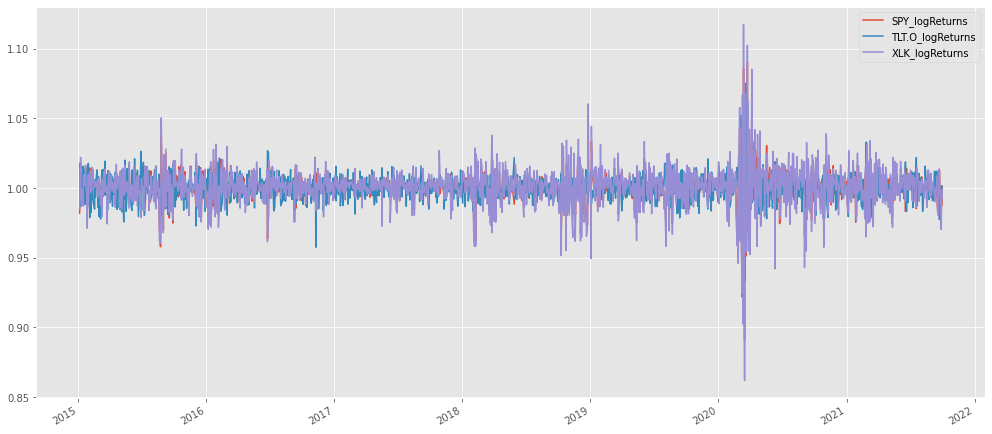

In [108]:
df_out_sample[['SPY_logReturns', 'TLT.O_logReturns', 'XLK_logReturns']].apply(np.exp).plot(figsize=(17, 8))

## DPG

<AxesSubplot:xlabel='date'>

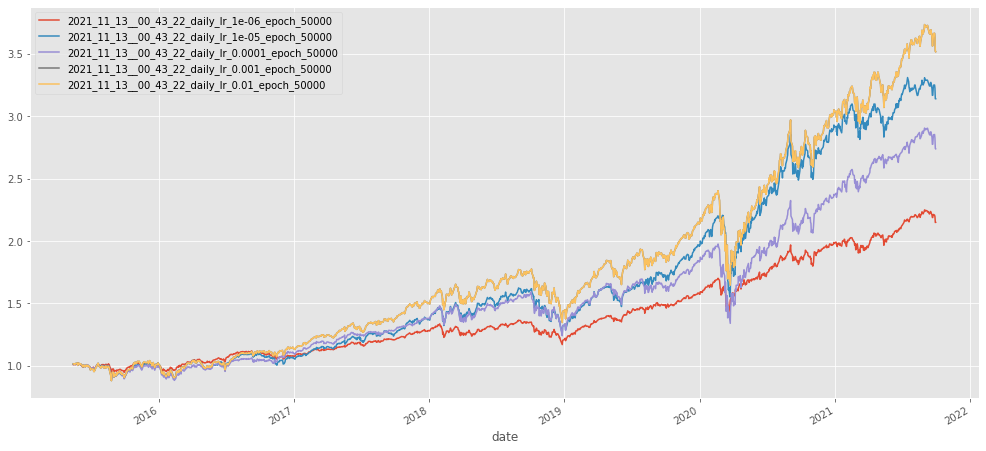

In [67]:
df_result_back = pd.read_csv('../results/backtest/2021_11_13__05_11_46_aggregated_dpg_v2.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [68]:
df_result_back.columns

Index(['2021_11_13__00_43_22_daily_lr_1e-06_epoch_50000',
       '2021_11_13__00_43_22_daily_lr_1e-05_epoch_50000',
       '2021_11_13__00_43_22_daily_lr_0.0001_epoch_50000',
       '2021_11_13__00_43_22_daily_lr_0.001_epoch_50000',
       '2021_11_13__00_43_22_daily_lr_0.01_epoch_50000'],
      dtype='object')

<AxesSubplot:xlabel='epoch'>

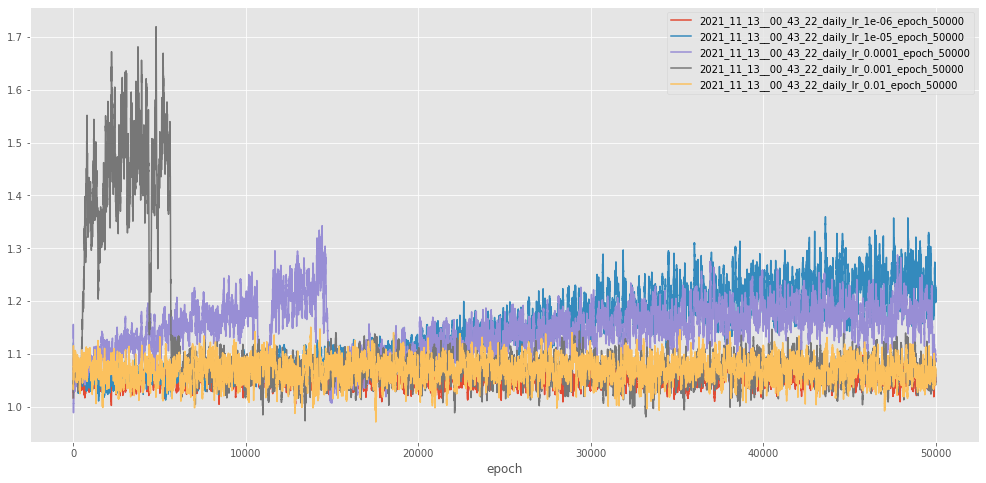

In [69]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_13__05_11_45_aggregated_dpg_v2.csv', index_col=0).rolling(50, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

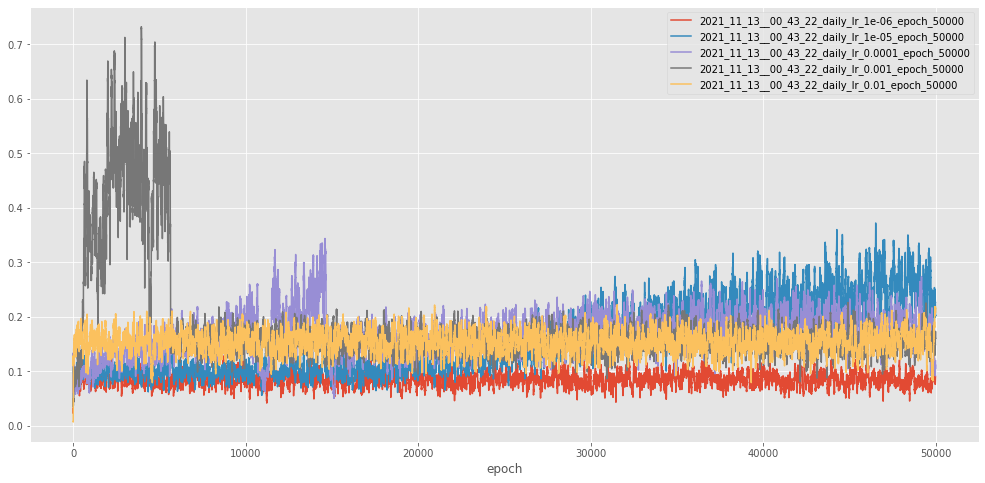

In [70]:
df_result_train1_std = pd.read_csv('../results/portfolio_values/2021_11_13__05_11_45_aggregated_dpg_v2.csv', index_col=0).rolling(50, min_periods=1).std()
df_result_train1_std.plot(figsize=(17,8))

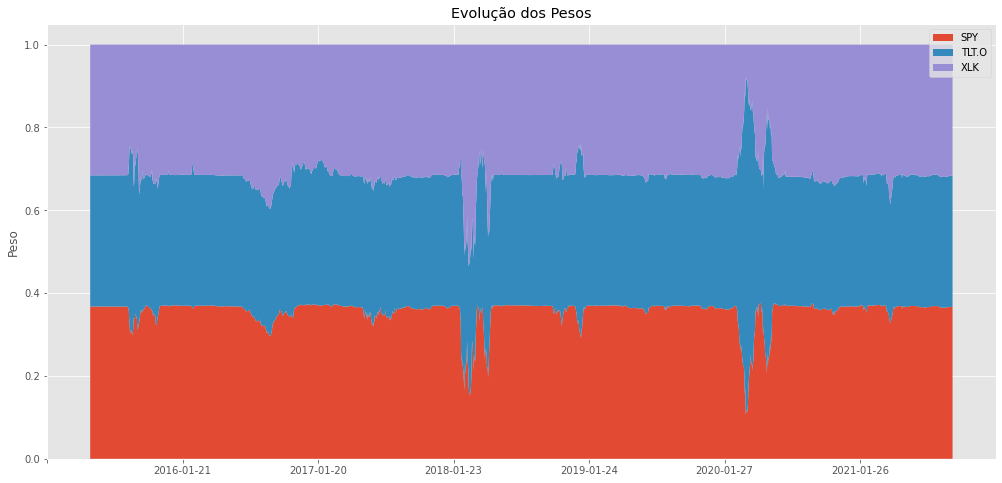

In [118]:
df_w = pd.read_csv('../results/weights/2021_11_13__00_43_22_daily_lr_1e-06_epoch_50000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
ax.legend()
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
plt.show()

#### Treino sem BatchNorm nas camadas de convolução

<AxesSubplot:xlabel='date'>

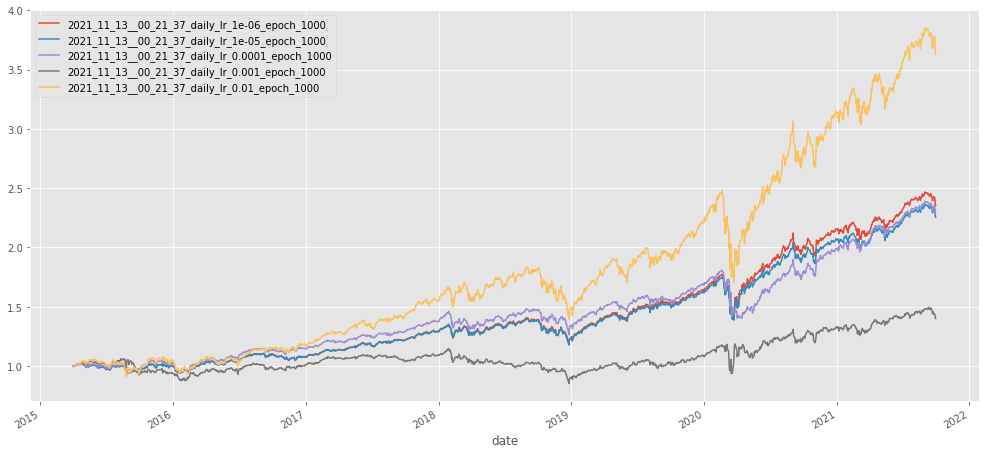

In [54]:
df_result_back = pd.read_csv('../results/backtest/2021_11_13__00_24_44_aggregated_dpg_v2.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [55]:
df_result_back.columns

Index(['2021_11_13__00_21_37_daily_lr_1e-06_epoch_1000',
       '2021_11_13__00_21_37_daily_lr_1e-05_epoch_1000',
       '2021_11_13__00_21_37_daily_lr_0.0001_epoch_1000',
       '2021_11_13__00_21_37_daily_lr_0.001_epoch_1000',
       '2021_11_13__00_21_37_daily_lr_0.01_epoch_1000'],
      dtype='object')

<AxesSubplot:xlabel='epoch'>

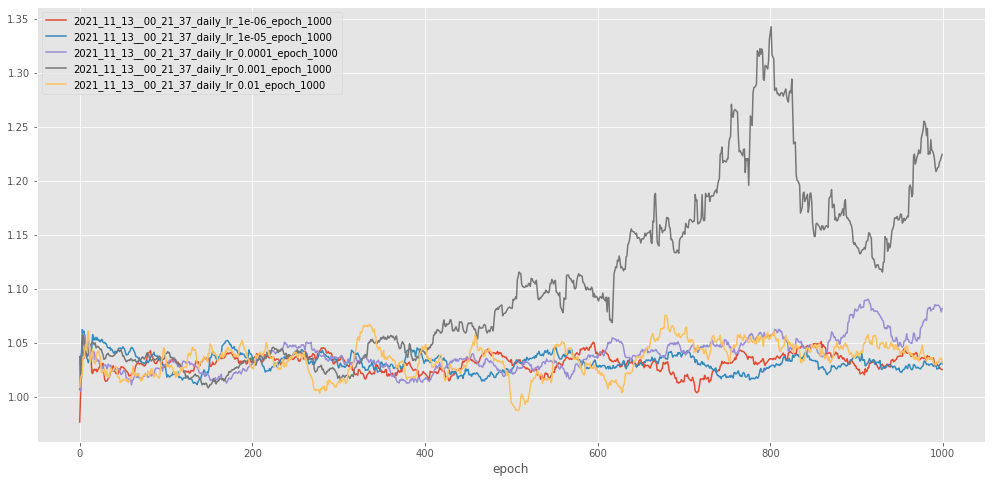

In [56]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_13__00_24_43_aggregated_dpg_v2.csv', index_col=0).rolling(50, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

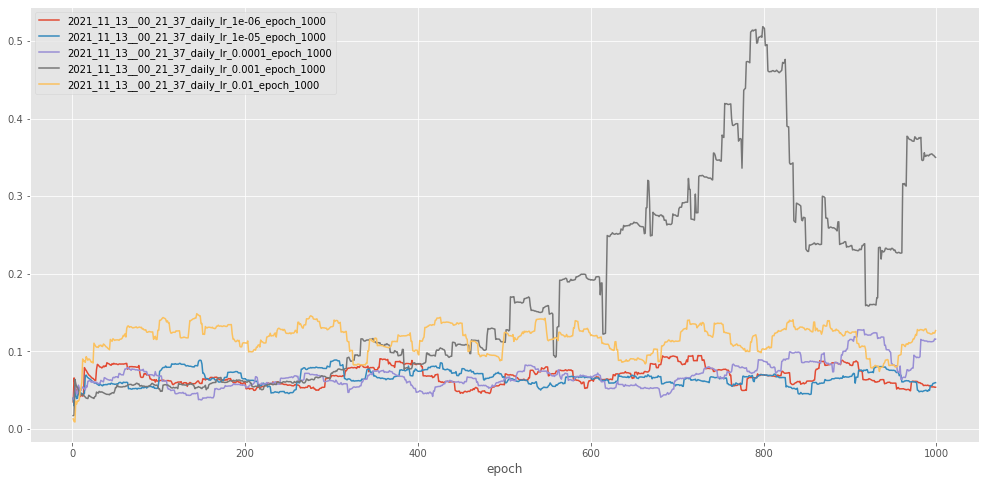

In [57]:
df_result_train1_std = pd.read_csv('../results/portfolio_values/2021_11_13__00_24_43_aggregated_dpg_v2.csv', index_col=0).rolling(50, min_periods=1).std()
df_result_train1_std.plot(figsize=(17,8))

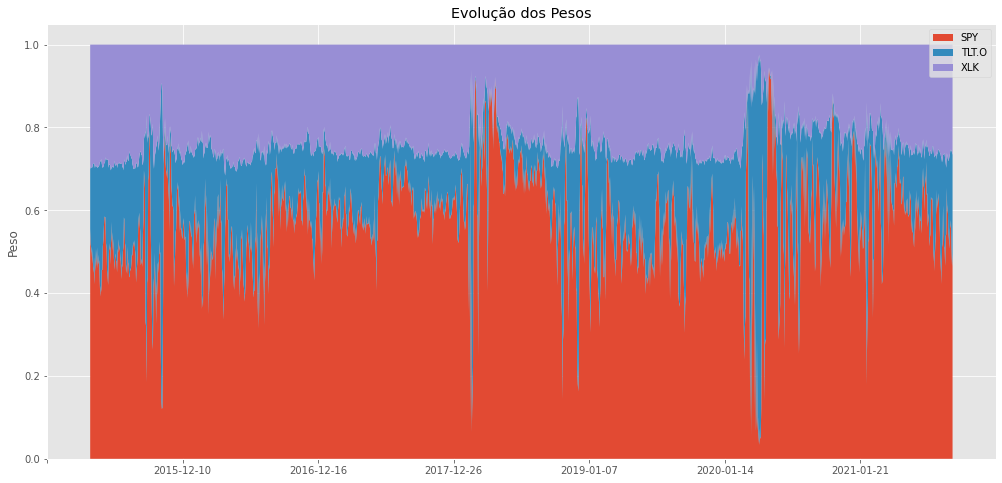

In [117]:
df_w = pd.read_csv('../results/weights/2021_11_13__00_21_37_daily_lr_0.0001_epoch_1000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
ax.legend()
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
plt.show()

#### Treino com dropout

<AxesSubplot:xlabel='date'>

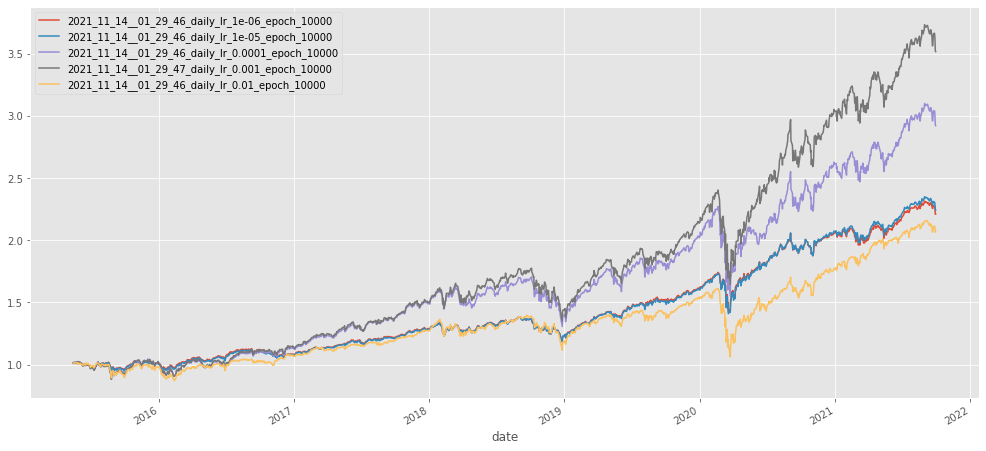

In [74]:
df_result_back = pd.read_csv('../results/backtest/2021_11_14__02_28_22_aggregated_dpg_v2.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [75]:
df_result_back.columns

Index(['2021_11_14__01_29_46_daily_lr_1e-06_epoch_10000',
       '2021_11_14__01_29_46_daily_lr_1e-05_epoch_10000',
       '2021_11_14__01_29_46_daily_lr_0.0001_epoch_10000',
       '2021_11_14__01_29_47_daily_lr_0.001_epoch_10000',
       '2021_11_14__01_29_46_daily_lr_0.01_epoch_10000'],
      dtype='object')

<AxesSubplot:xlabel='epoch'>

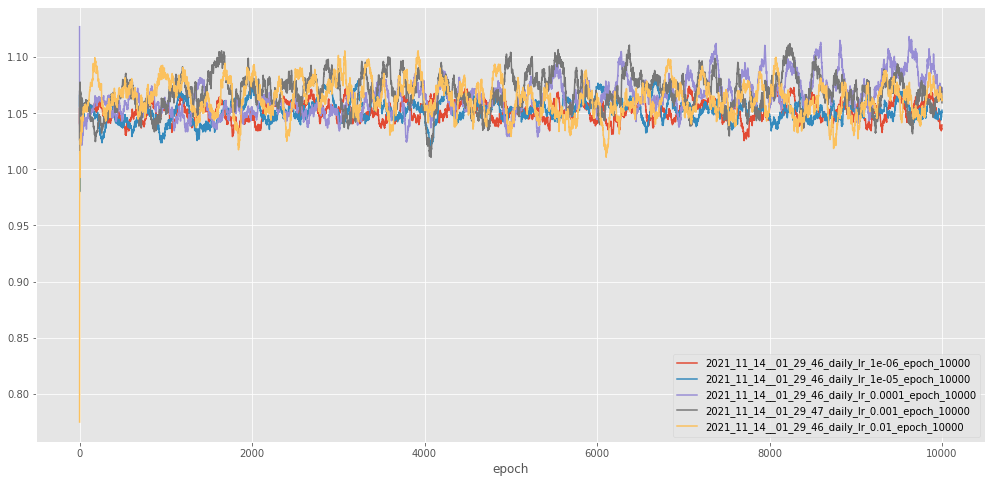

In [78]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_14__02_28_22_aggregated_dpg_v2.csv', index_col=0).rolling(100, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

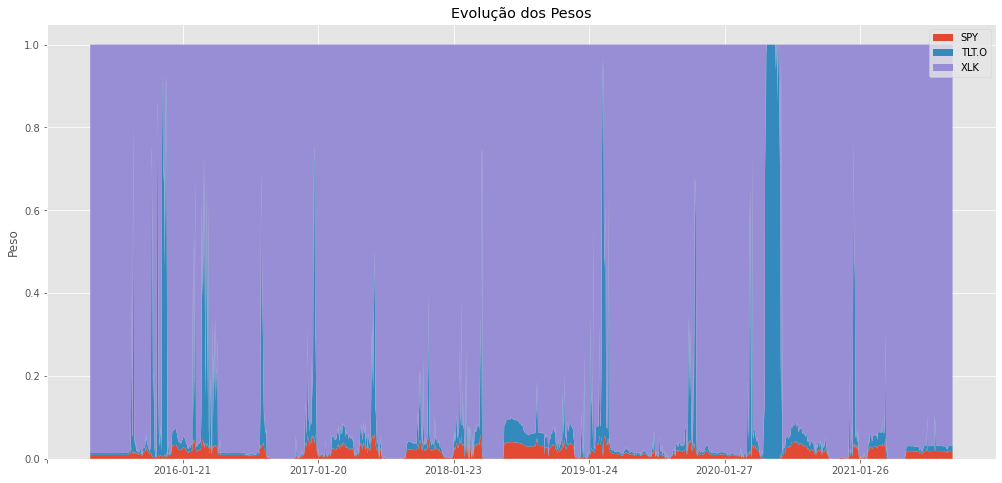

In [116]:
df_w = pd.read_csv('../results/weights/2021_11_14__01_29_46_daily_lr_0.0001_epoch_10000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
ax.legend()
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
plt.show()

#### Usando Sharpe Ratio como objetivo

<AxesSubplot:xlabel='date'>

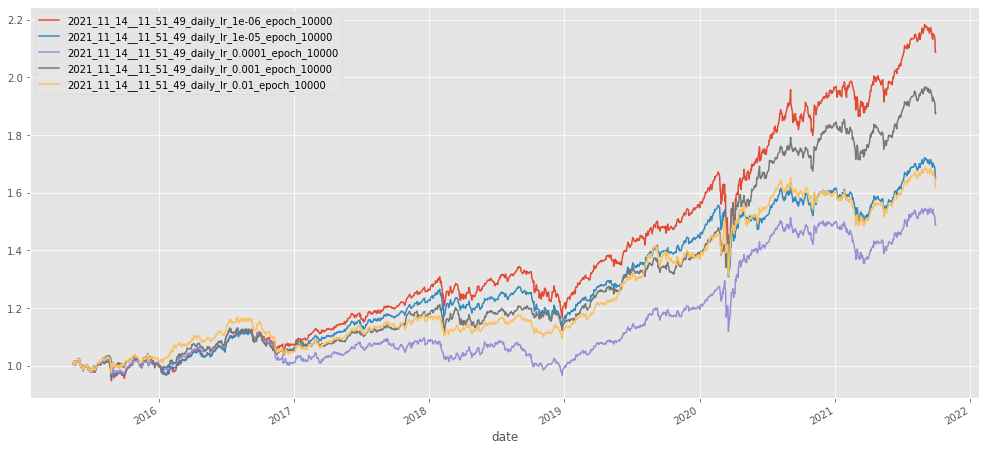

In [95]:
df_result_back = pd.read_csv('../results/backtest/2021_11_14__12_45_03_aggregated_dpg_v2.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

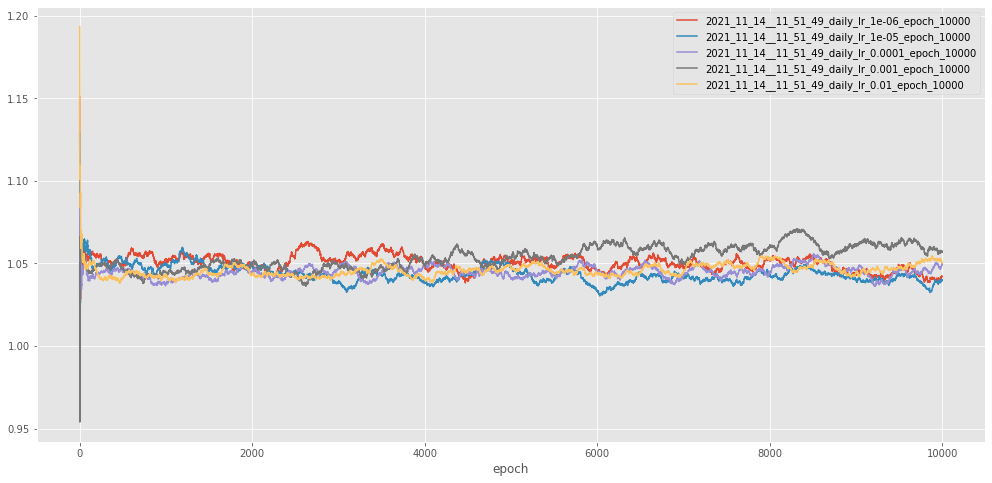

In [87]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_14__12_45_03_aggregated_dpg_v2.csv', index_col=0).rolling(300, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

In [88]:
df_result_back.columns

Index(['2021_11_14__11_51_49_daily_lr_1e-06_epoch_10000',
       '2021_11_14__11_51_49_daily_lr_1e-05_epoch_10000',
       '2021_11_14__11_51_49_daily_lr_0.0001_epoch_10000',
       '2021_11_14__11_51_49_daily_lr_0.001_epoch_10000',
       '2021_11_14__11_51_49_daily_lr_0.01_epoch_10000'],
      dtype='object')

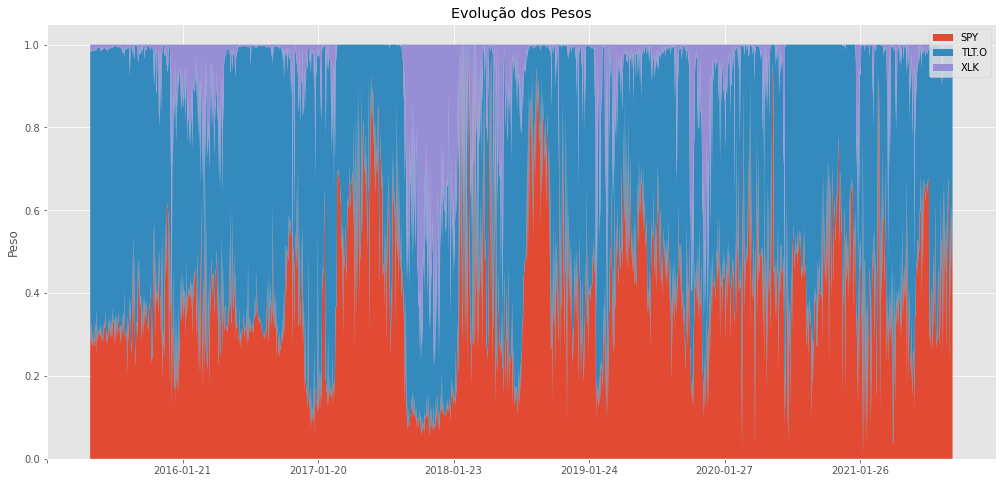

In [115]:
df_w = pd.read_csv('../results/weights/2021_11_14__11_51_49_daily_lr_0.001_epoch_10000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

In [114]:
start

-80.30000000000001

<AxesSubplot:>

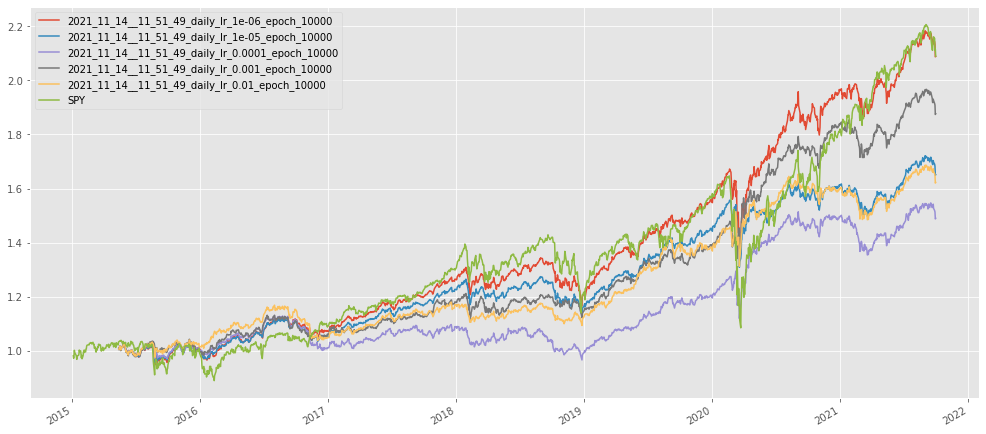

In [96]:
df_all = pd.concat(
    [
        df_result_back, 
        df_out_sample[['SPY']]
    ], axis=1
)
df_all.plot(figsize=(17,8))

#### Treino usando dados semanais, e com o valor do portfólio como objetivo

<AxesSubplot:xlabel='date'>

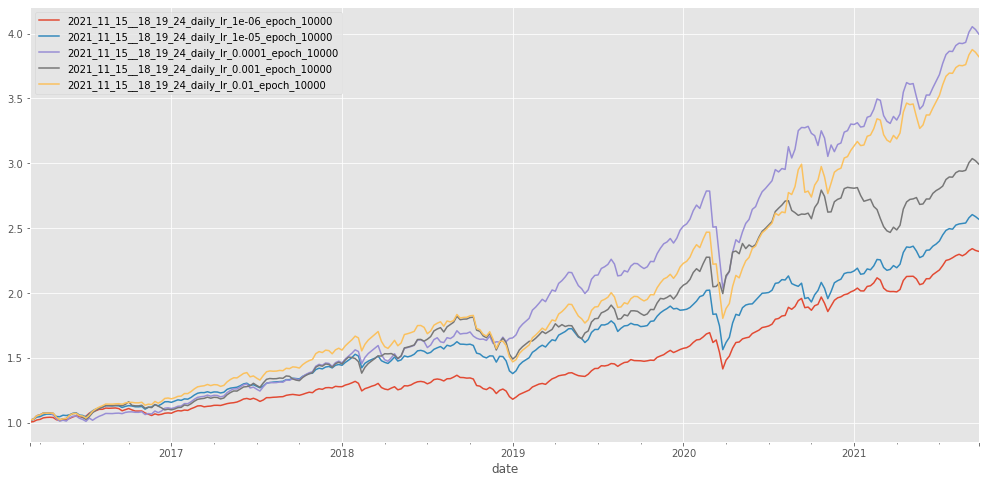

In [119]:
df_result_back = pd.read_csv('../results/backtest/2021_11_15__19_14_08_aggregated_dpg_week.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

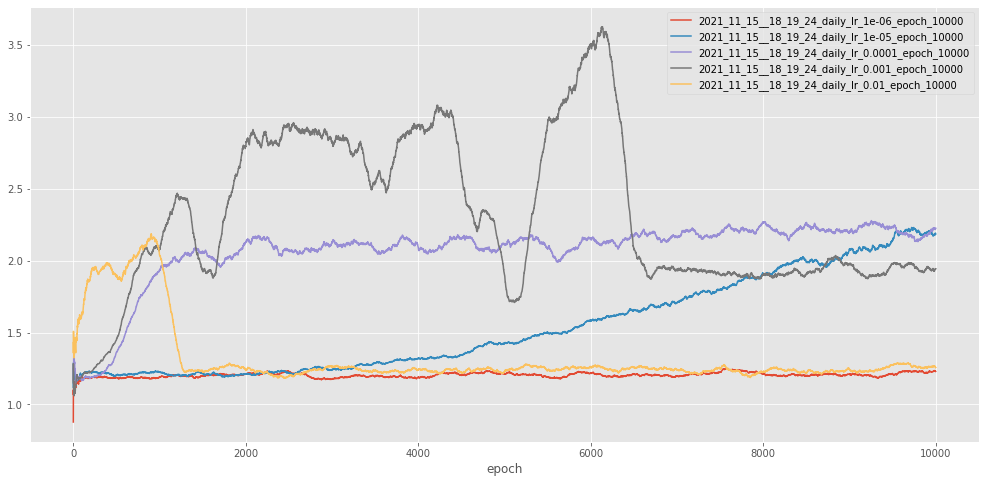

In [122]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_15__19_14_07_aggregated_dpg_week.csv', index_col=0).rolling(300, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

In [123]:
df_result_back.columns

Index(['2021_11_15__18_19_24_daily_lr_1e-06_epoch_10000',
       '2021_11_15__18_19_24_daily_lr_1e-05_epoch_10000',
       '2021_11_15__18_19_24_daily_lr_0.0001_epoch_10000',
       '2021_11_15__18_19_24_daily_lr_0.001_epoch_10000',
       '2021_11_15__18_19_24_daily_lr_0.01_epoch_10000'],
      dtype='object')

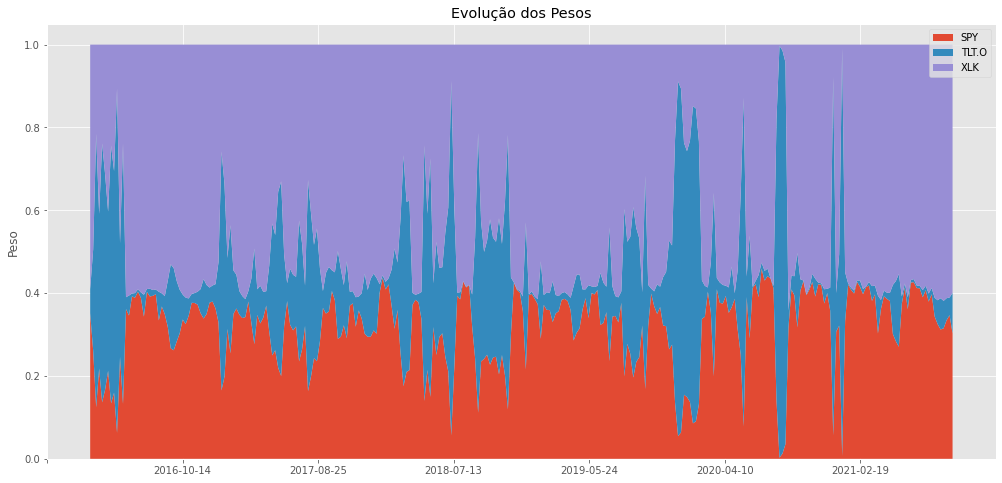

In [128]:
df_w = pd.read_csv('../results/weights/2021_11_15__18_19_24_daily_lr_1e-05_epoch_10000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

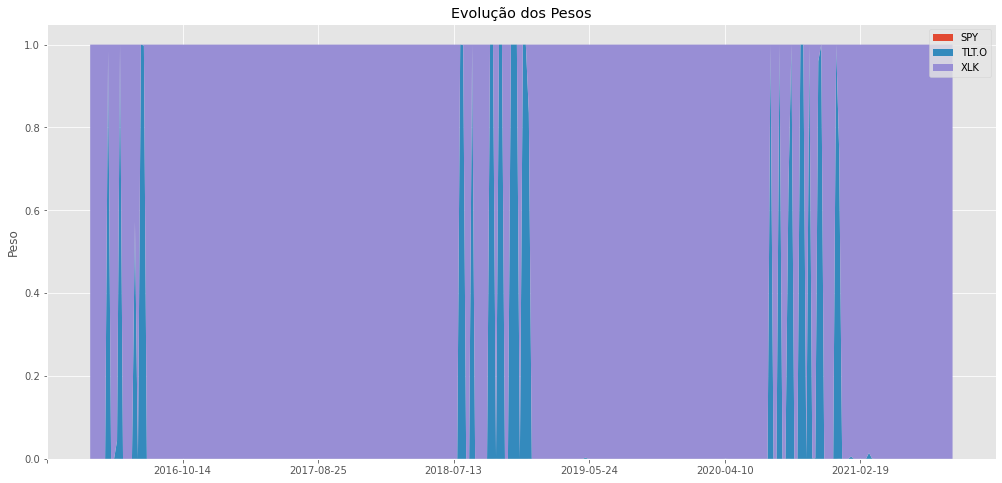

In [129]:

df_w = pd.read_csv('../results/weights/2021_11_15__18_19_24_daily_lr_0.0001_epoch_10000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

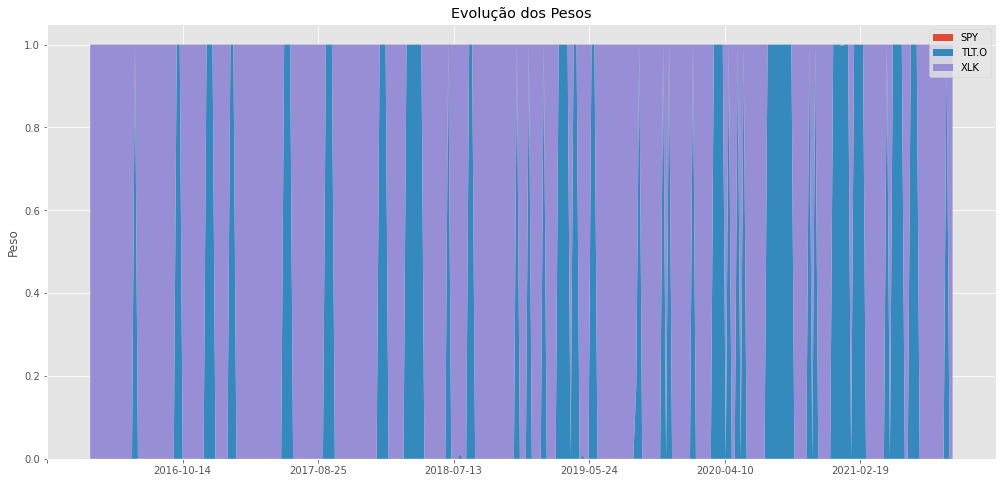

In [130]:
df_w = pd.read_csv('../results/weights/2021_11_15__18_19_24_daily_lr_0.001_epoch_10000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

#### Treino com dados diários e filtros maiores 

<AxesSubplot:xlabel='date'>

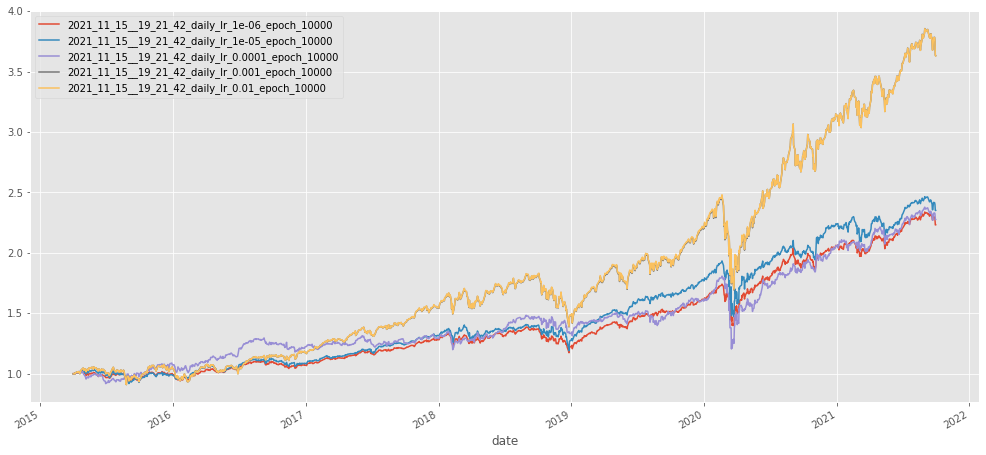

In [131]:
df_result_back = pd.read_csv('../results/backtest/2021_11_15__20_16_26_aggregated_dpg_daily_new_cnn.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [132]:
df_result_back.columns

Index(['2021_11_15__19_21_42_daily_lr_1e-06_epoch_10000',
       '2021_11_15__19_21_42_daily_lr_1e-05_epoch_10000',
       '2021_11_15__19_21_42_daily_lr_0.0001_epoch_10000',
       '2021_11_15__19_21_42_daily_lr_0.001_epoch_10000',
       '2021_11_15__19_21_42_daily_lr_0.01_epoch_10000'],
      dtype='object')

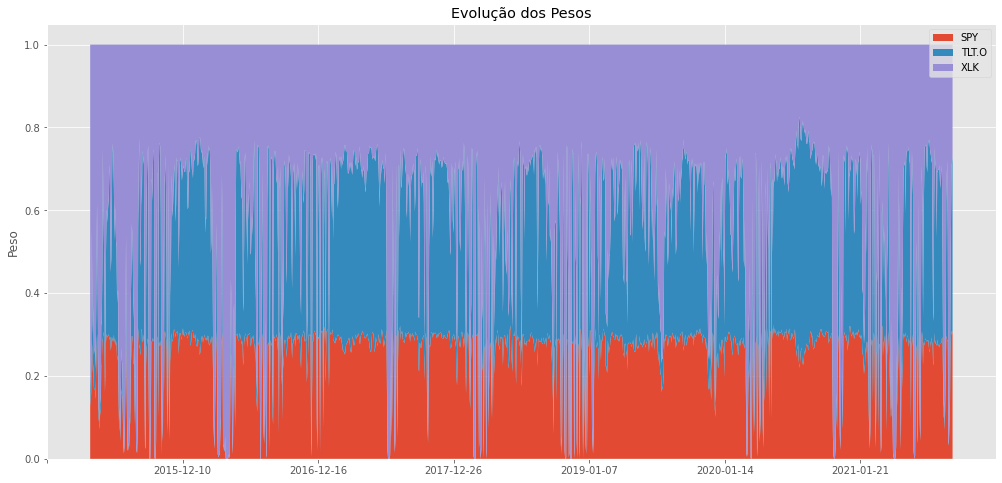

In [138]:
df_w = pd.read_csv('../results/weights/2021_11_15__19_21_42_daily_lr_1e-05_epoch_10000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()
plt.show()

#### Treino usando LSTM

As features foram construídas como no treinamento simples anterior, mas dessa vez o modelo do ator contava com um LSTM para aprender temporalidade, com 20 unidades

<AxesSubplot:xlabel='date'>

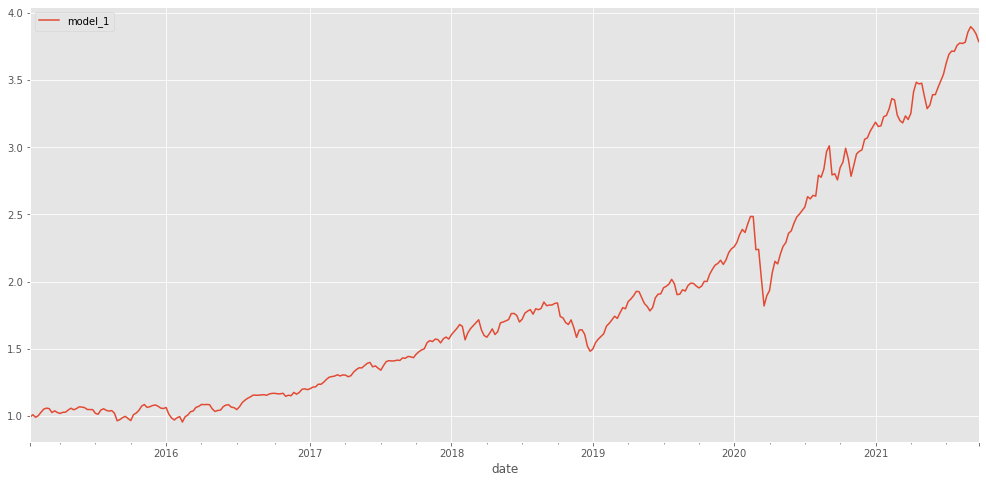

In [93]:
df_result_back = pd.read_csv('../results/backtest/2021_11_15__00_26_40_dpg_ltsm_lr_0.0001_epoch_50000.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

<AxesSubplot:>

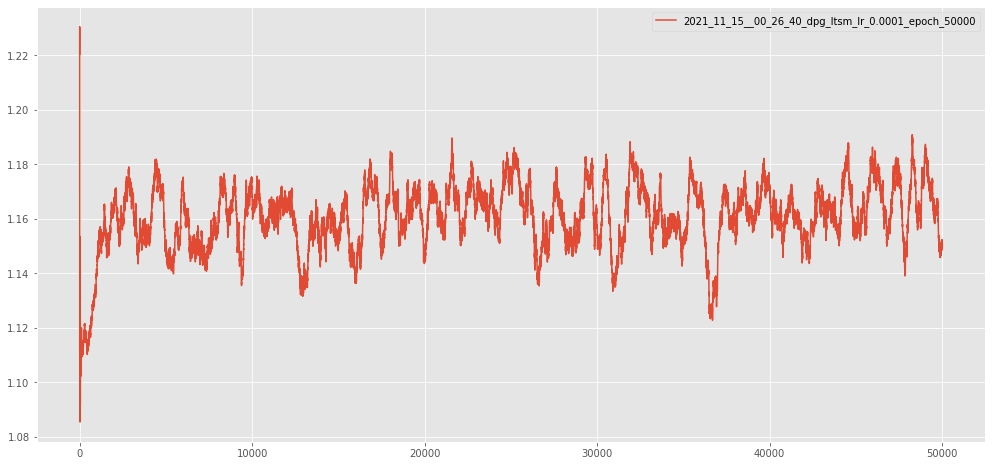

In [100]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_15__00_26_40_dpg_ltsm_lr_0.0001_epoch_50000.csv').rolling(500, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

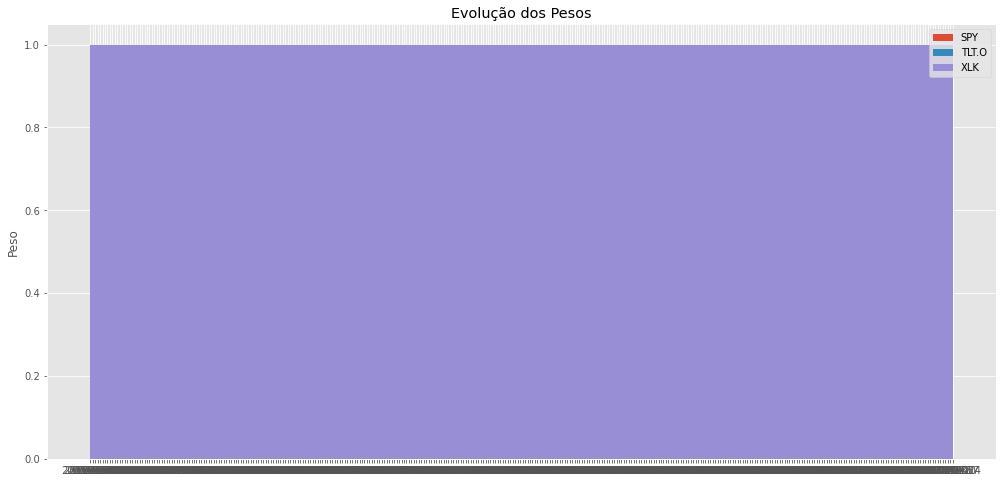

In [94]:
df_w = pd.read_csv('../results/weights/2021_11_15__00_26_40_dpg_ltsm_lr_0.0001_epoch_50000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
ax.legend()
plt.show()

#### Testando LSTM com Sharpe como métrica

<AxesSubplot:xlabel='date'>

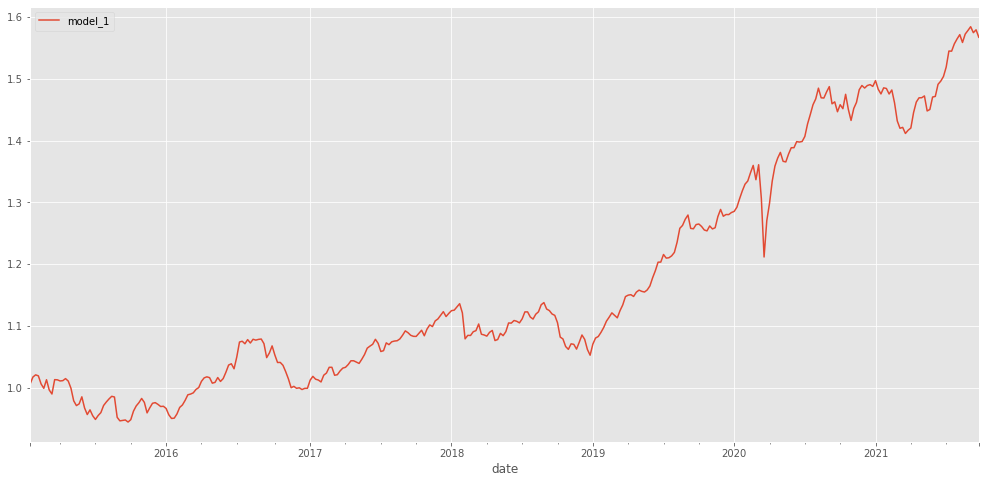

In [101]:
df_result_back = pd.read_csv('../results/backtest/2021_11_15__12_01_44_dpg_ltsm_lr_0.0001_epoch_10000.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

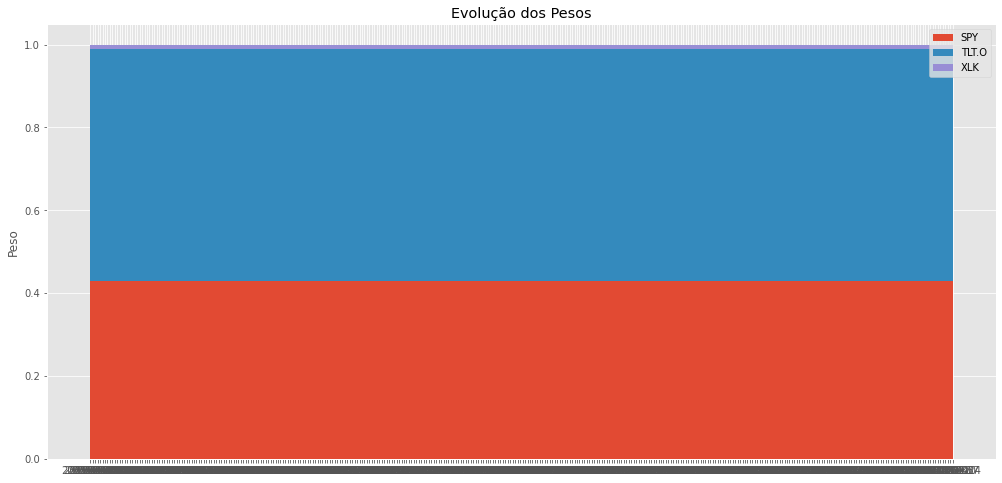

In [102]:
df_w = pd.read_csv('../results/weights/2021_11_15__12_01_44_dpg_ltsm_lr_0.0001_epoch_10000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
ax.legend()
plt.show()

<AxesSubplot:xlabel='epoch'>

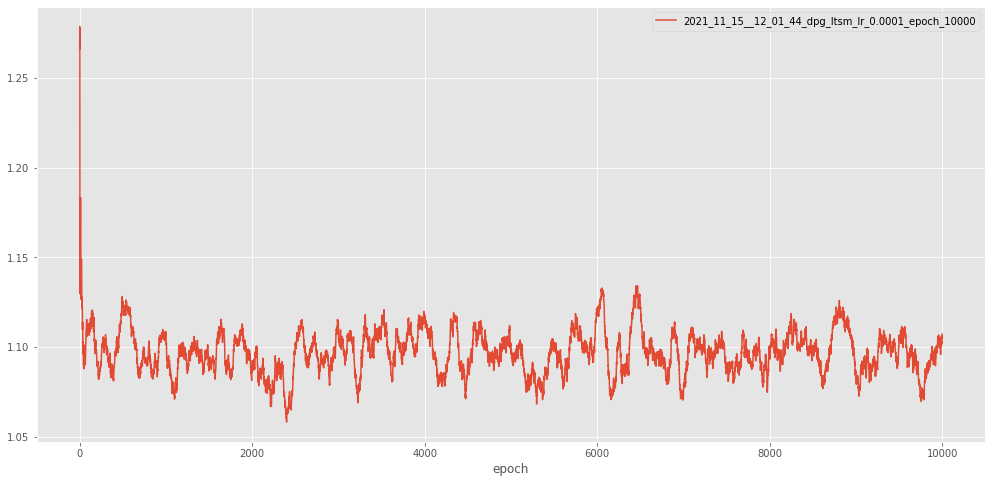

In [105]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_15__12_01_44_dpg_ltsm_lr_0.0001_epoch_10000.csv', index_col=0).rolling(100, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

In [ ]:
df_result_loss = pd.read_csv('../results/losses/dpg_sharpe/2021_11_15__12_01_44_dpg_ltsm_lr_0.0001_epoch_10000.csv', index_col=0).rolling(100, min_periods=1).mean()
df_result_loss.plot(figsize=(17,8))